<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Bike Sharing - Boom Bikes  <br> (LR Model) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement
> A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
>They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

> - Which variables are significant in predicting the demand for shared bikes.
> - How well those variables describe the bike demands.

>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## The steps to be followed to solve this exercise:
- To Read, Understand and Visulaize the data
- Preparing the data for Model Training (Train-Test split, Rescaling)
- Training the Model
- To conduct Residual Analysis
- Evaluation of the Test Set

## Table of Contents
* **[Technologies Used](#1)**
* **[Importing Libraries](#3)**
* **[Reading the Dataset](#4)**
* **[Data Visualization](#5)**
* **[Preparing the data for Model Training](#6)**
* **[Residual Analysis](#7)**
* **[Evaluation of the Test Set](#8)**
* **[Summary](#9)**

<a id="1"> </a>
## Technologies Used
- Numpy
- Pandas
- Seaborn
- Matplotlib
- SK_Learn
- Statsmodels

## Contact
Created by [@Shub2204] - feel free to contact me!
- LinkedIn : www.linkedin.com/in/shubham-anand-aa7560bb

<a id="3"> </a>
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a id="4"> </a>
## Reading the Dataset

In [2]:
# Read the dataset 
df1 = pd.read_csv(r'C:\Users\shubh\OneDrive\Documents\day.csv')

In [3]:
df1.shape

(730, 16)

In [4]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<a id="5"> </a>
## Data Visualization

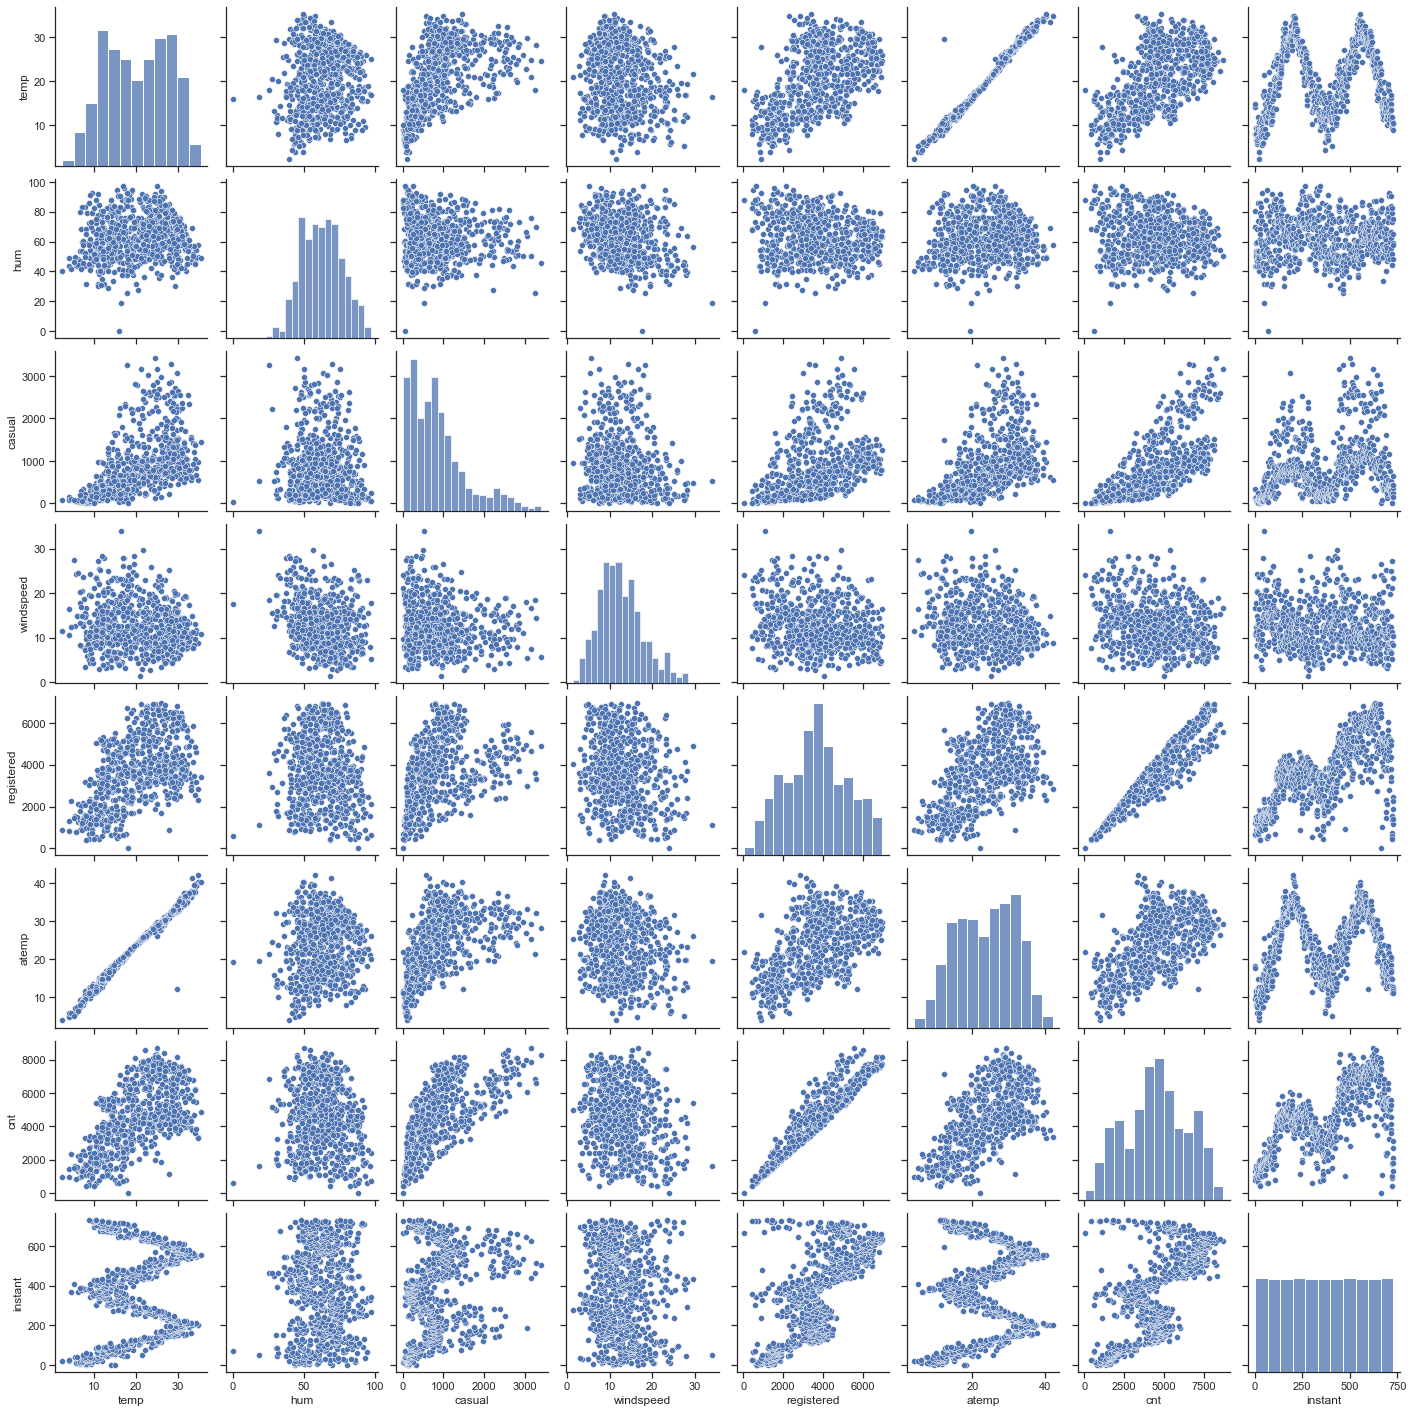

In [8]:
sns.set(style="ticks")
sns.pairplot(df1, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In the graph above, we can see that temperature, humidity, and windspeed are strongly correlated with the count variable. Our next step will be to explore these correlations with different variables.

In [9]:
df1.replace({'season': {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},
             'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
             'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
             'weathersit': {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Snow + Fog'}
            }, inplace=True)

In [10]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


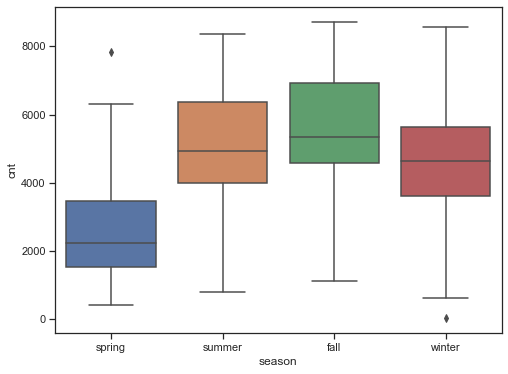

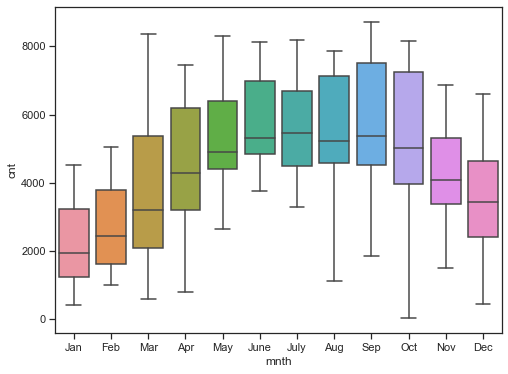

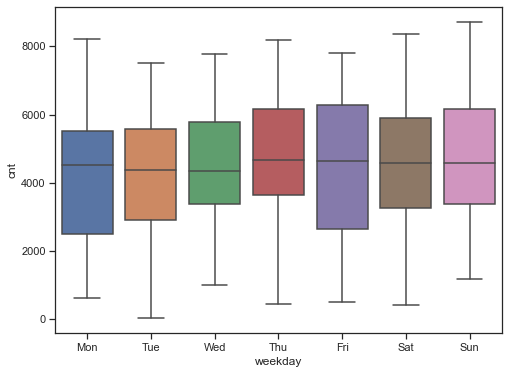

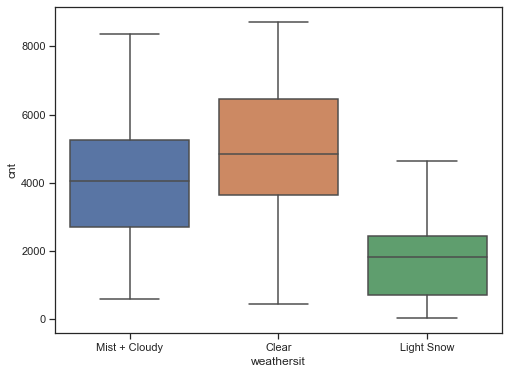

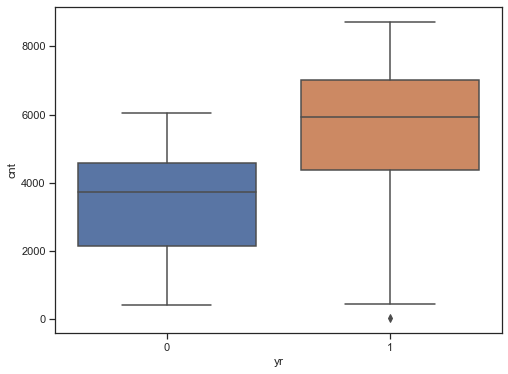

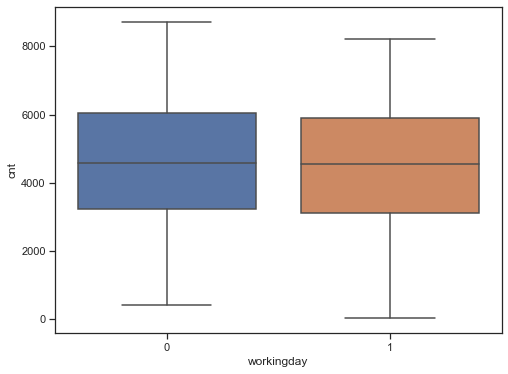

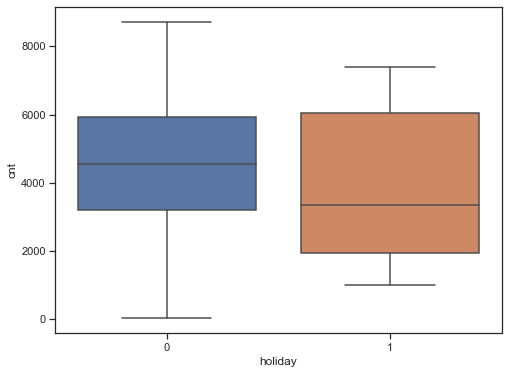

In [11]:
cat_vars = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'workingday', 'holiday']

for var in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y='cnt', data=df1)
    plt.show()

**Interpretation:**
- Summer and fall are the best times for people to rent bikes.
- September and October have the highest bike rental rates.
- More bicycles are leased on Saturdays, Wednesdays, and Thursdays.
- The majority of bike rentals occur when the weather is clear.
- 2019 saw an increase in bike rentals.
- Whether it is a working day or not, there is no significant impact on the cost of renting a bike.
- On holidays, bike rental rates are higher.

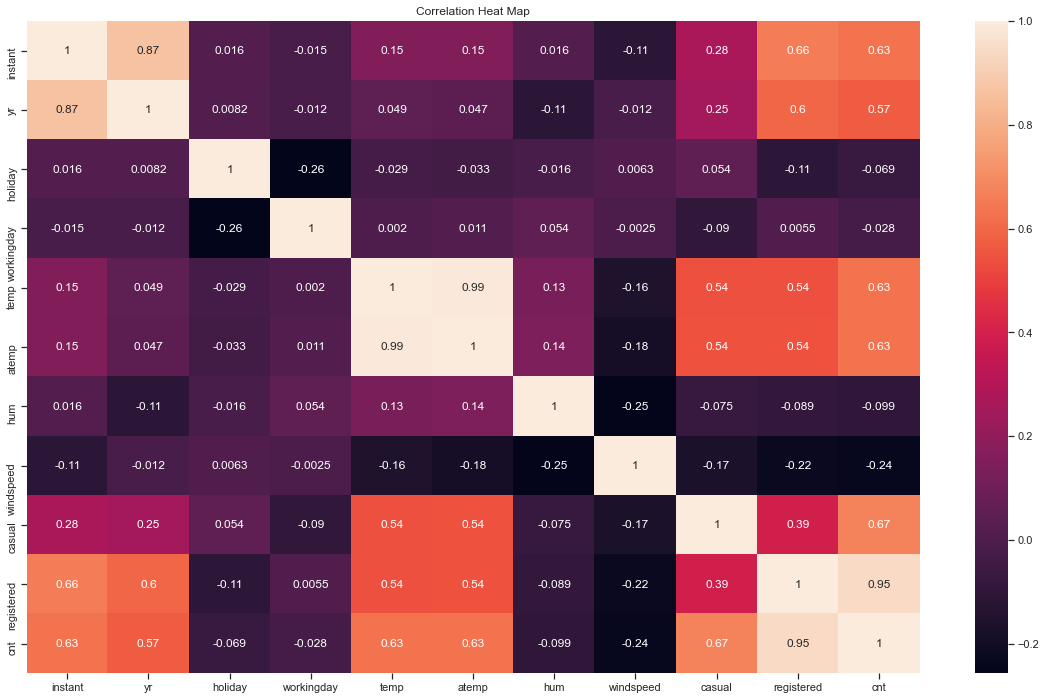

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation Heat Map')
plt.show()

In [13]:
#dropping the variables from the dataset which are not required for the analysis
df1 = df1.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
df1.shape

(730, 11)

In [15]:
#creating dummy variables for the variables month, weekday, weathersit, seasons
month = pd.get_dummies(df1.mnth, drop_first=True)
weekday = pd.get_dummies(df1.weekday, drop_first=True)
weathersit = pd.get_dummies(df1.weathersit, drop_first=True)
season = pd.get_dummies(df1.season, drop_first=True)

In [16]:
#adding the dummy variables to the original dataframe
df1 = pd.concat([df1,month, weekday, weathersit, season], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df1.shape

(730, 29)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

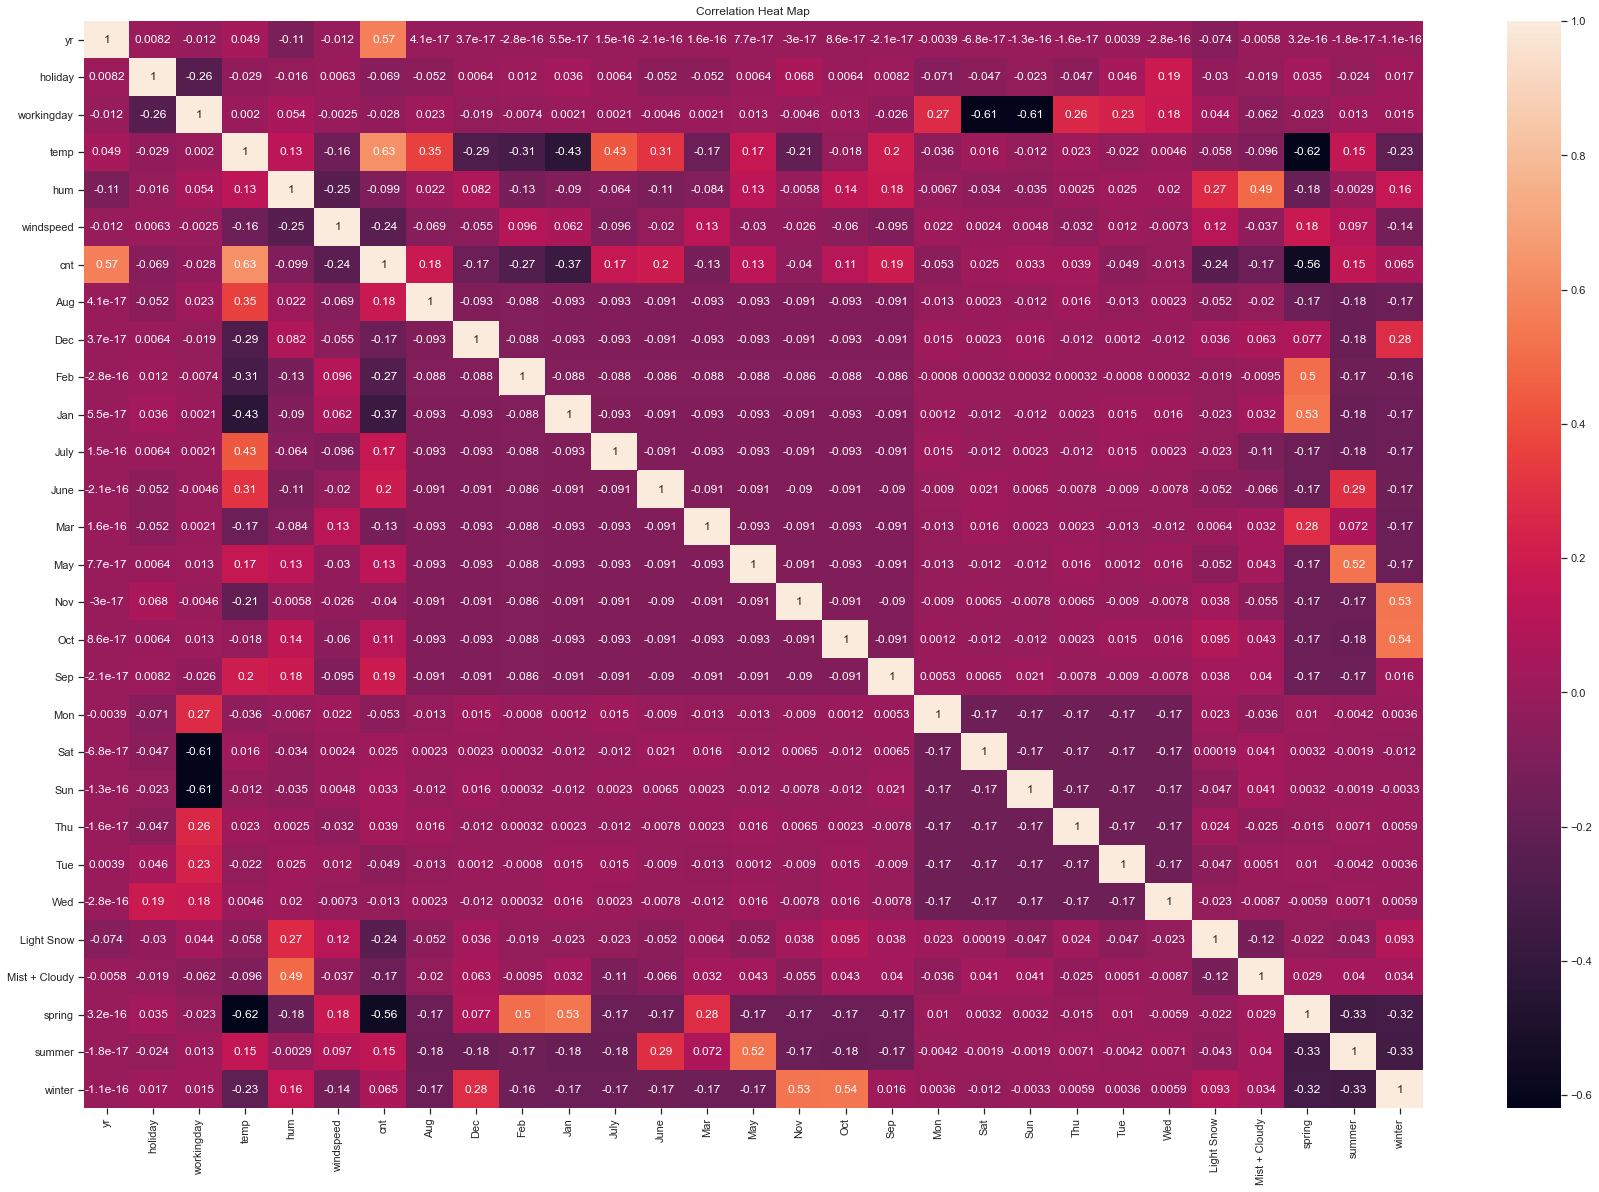

In [20]:
#making a heatmap to showcase correlation between the new variables 
plt.figure(figsize=(30, 20))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation Heat Map')
plt.show()

<a id="6"> </a>
## Preparing the data for Model Training

**1. Split the data into training and test sets**

In [21]:
# splitting the data into training and test sets
df1_train,df1_test = train_test_split(df1,train_size=0.7,random_state=10)
display(df1_train.shape)
display(df1_test.shape)

(510, 29)

(220, 29)

**2. Scaling the variables**

In [22]:
# As we saw that Data we were uniform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# list of numerical variables need to be scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# fit and transform the data
df1_train[num_vars]=scaler.fit_transform(df1_train[num_vars])

# to view the statistical description to ensure MinMax Scaling has done properly
df1_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.033333,0.179682,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.696078,0.460401,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.513354,0.233194,0.0,0.314983,0.506613,0.721686,1.0
hum,510.0,0.563841,0.183851,0.0,0.426048,0.562400,0.697621,1.0
windspeed,510.0,0.342904,0.162760,0.0,0.225964,0.322431,0.434281,1.0
cnt,510.0,0.492000,0.236196,0.0,0.325456,0.490945,0.675812,1.0
Aug,510.0,0.076471,0.266010,0.0,0.000000,0.000000,0.000000,1.0
Dec,510.0,0.094118,0.292279,0.0,0.000000,0.000000,0.000000,1.0
Feb,510.0,0.076471,0.266010,0.0,0.000000,0.000000,0.000000,1.0


**Interpretation:** Since we can se that the maximum value is 1 for all the variables, which indicates that rescaling process is done.

**3.Training the Model**

In [23]:
#splitting the dependent and independent variable 
y_train = df1_train['cnt']
X_train = df1_train.drop('cnt', axis=1)

In [24]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
72,0,0,1,0.298094,0.393891,0.236118,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
510,1,0,0,0.778657,0.694105,0.364071,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
700,1,0,1,0.327249,0.809877,0.210252,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
264,0,0,0,0.694699,0.910249,0.217975,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
577,1,0,1,0.811368,0.624004,0.244886,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
y_train.head()

72     0.194978
510    0.737052
700    0.509236
264    0.526862
577    0.863093
Name: cnt, dtype: float64

In [26]:
# add a constant (intercept)
X_train_sm = sm.add_constant(X_train[['temp']])

# create first model
lr_model = sm.OLS(y_train, X_train_sm).fit()

# check model summary 
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     299.0
Date:                Mon, 08 May 2023   Prob (F-statistic):           5.16e-53
Time:                        09:52:15   Log-Likelihood:                 130.83
No. Observations:                 510   AIC:                            -257.7
Df Residuals:                     508   BIC:                            -249.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1755      0.020      8.732      0.0

**Interpretation:** R-Square 0.37 shows that 37% of variance is explained by the 'temp' variable alone.

In [27]:
# Now adding another variable 'yr' to perform multiple regression and also checking to see if it improves the R-squared

# add a constant (intercept)
X_train_sm2 = sm.add_constant(X_train[['temp', 'yr']])

# create second model
lr_model = sm.OLS(y_train, X_train_sm2).fit()

# check model summary 
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     560.9
Date:                Mon, 08 May 2023   Prob (F-statistic):          3.24e-129
Time:                        09:52:15   Log-Likelihood:                 310.43
No. Observations:                 510   AIC:                            -614.9
Df Residuals:                     507   BIC:                            -602.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      0.015      3.261      0.0

**Interpretation:** R-Square 0.689 shows that ~70% of variance is explained by the 'temp' and 'yr' variable alone.

In [28]:
#building model with all variables
X_train_sm3 = sm.add_constant(X_train)

#create third model with all variables
lr_model = sm.OLS(y_train, X_train_sm3).fit()

# check model summary 
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     98.26
Date:                Mon, 08 May 2023   Prob (F-statistic):          2.70e-179
Time:                        09:52:15   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     481   BIC:                            -816.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3967      0.078      5.086

**Interpretation:** R-Square 0.851 shows that ~85% of variance is explained by all the variables.

**4. Applying RFE Method to identify the best 14 predictive variables.**

In [29]:
# create a linear regression object
lm = LinearRegression()

# fit the linear regression model to the training data
lm.fit(X_train, y_train)

# create an RFE object with 15 features
rfe = RFE(estimator=lm, n_features_to_select=14)

# fit the RFE object on the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [30]:
# get the features selected and rejected by the RFE object
features = X_train.columns
selected_features = features[rfe.support_]
rejected_features = features[~rfe.support_]

# print out the selected and rejected features with their support and ranking
for feature, support, ranking in zip(features, rfe.support_, rfe.ranking_):
    print(f"Feature: {feature}, Support: {support}, Ranking: {ranking}")

# print out the selected features
print("Selected Features:")
print(selected_features)

# print out the rejected features
print("Rejected Features:")
print(rejected_features)

Feature: yr, Support: True, Ranking: 1
Feature: holiday, Support: True, Ranking: 1
Feature: workingday, Support: False, Ranking: 5
Feature: temp, Support: True, Ranking: 1
Feature: hum, Support: True, Ranking: 1
Feature: windspeed, Support: True, Ranking: 1
Feature: Aug, Support: False, Ranking: 3
Feature: Dec, Support: True, Ranking: 1
Feature: Feb, Support: True, Ranking: 1
Feature: Jan, Support: True, Ranking: 1
Feature: July, Support: True, Ranking: 1
Feature: June, Support: False, Ranking: 4
Feature: Mar, Support: False, Ranking: 11
Feature: May, Support: False, Ranking: 7
Feature: Nov, Support: True, Ranking: 1
Feature: Oct, Support: False, Ranking: 15
Feature: Sep, Support: False, Ranking: 2
Feature: Mon, Support: False, Ranking: 14
Feature: Sat, Support: False, Ranking: 9
Feature: Sun, Support: False, Ranking: 8
Feature: Thu, Support: False, Ranking: 6
Feature: Tue, Support: False, Ranking: 10
Feature: Wed, Support: False, Ranking: 12
Feature: Light Snow, Support: True, Ranking

In [31]:
#building model using selected RFE variables

X_train_rfe = X_train[selected_features]

In [32]:
# Now building the model with best selected features
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr_model = sm.OLS(y_train, X_train_rfe).fit()

#summary of model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Mon, 08 May 2023   Prob (F-statistic):          8.44e-189
Time:                        09:52:15   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     495   BIC:                            -877.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3592      0.029     12.321

**Interpretation:** Now with the best 14 selected features R-square shows that 84.3% variance is explained by the model.

**5. Checking for the multicollinearity by using VIF.**

In [33]:
#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [34]:
# get the features selected by the RFE object
X_train_selected = X_train.loc[:, rfe.support_]

# calculate the VIF for each selected feature
vif = pd.DataFrame()
vif['Features'] = X_train_selected.columns
vif['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

# print out the VIF values
print(vif)

         Features    VIF
3             hum  17.18
2            temp  13.43
4       windspeed   4.76
12         spring   4.47
13         winter   2.81
11  Mist + Cloudy   2.50
7             Jan   2.40
6             Feb   2.16
0              yr   2.08
9             Nov   1.85
5             Dec   1.72
10     Light Snow   1.44
8            July   1.38
1         holiday   1.06


**How to perform variable elimination?**

There are different conditions that can be useful to determine which variables to eliminate from a regression model. 

- First approach is to examine both the p-values and VIF values of the variables. If a variable has both a high p-value and high VIF, it should definitely be dropped from the model. 

- If a variable has a high p-value but a low VIF, it should be removed first, the model should be rebuilt and VIF should be checked again.

- On the other hand, if a variable has a low p-value but a high VIF, it can be removed later. 

- Finally, if a variable has both a low p-value and low VIF, it should be kept in the model.

In [35]:
#dropping 'hum' variable due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)

#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr_model = sm.OLS(y_train, X_train_lr1).fit()

#summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 08 May 2023   Prob (F-statistic):          4.11e-186
Time:                        09:52:15   Log-Likelihood:                 476.17
No. Observations:                 510   AIC:                            -924.3
Df Residuals:                     496   BIC:                            -865.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2968      0.026     11.580

In [36]:
#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [37]:
# get the features selected by the RFE object
X_train_selected = X_train_new_1

# calculate the VIF for each selected feature
vif = pd.DataFrame()
vif['Features'] = X_train_selected.columns
vif['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

# print out the VIF values
print(vif)

         Features   VIF
3       windspeed  4.74
2            temp  4.57
11         spring  4.20
12         winter  2.60
6             Jan  2.29
5             Feb  2.14
0              yr  2.05
8             Nov  1.81
4             Dec  1.63
10  Mist + Cloudy  1.54
7            July  1.32
9      Light Snow  1.10
1         holiday  1.06


**Interpretation:** 
- All variables are having p-values less than 0.05 so all variables are significant in predicting the target variable.
- Since all VIF value is less than 5 which shows there is no case of multicollinearity, all of them has been removed.
- R-Square of 0.837 shows ~84% of variance is explained by the model.

<a id="7"> </a>
## Residual Analysis

In [38]:
# Adding constant in final X_train model
X_train_lr1 = sm.add_constant(X_train_lr1)
X_train_lr1.head()

,const,yr,holiday,temp,windspeed,Dec,Feb,Jan,July,Nov,Light Snow,Mist + Cloudy,spring,winter
72,1.0,0,0,0.298094,0.236118,0,0,0,0,0,0,0,1,0
510,1.0,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.210252,1,0,0,0,0,0,1,0,1
264,1.0,0,0,0.694699,0.217975,0,0,0,0,0,0,1,0,0
577,1.0,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0,0


In [39]:
#y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr1)

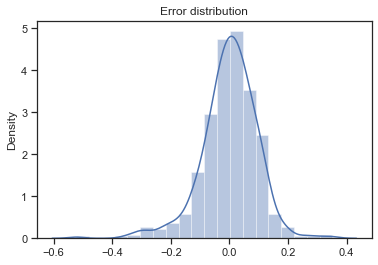

In [40]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res, bins=20)
plt.title('Error distribution')
plt.show()

In [41]:
num_vars

['temp', 'windspeed', 'hum', 'cnt']

In [42]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
df1_test[num_vars] = scaler.transform(df1_test[num_vars])
df1_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,220.0,0.481818,0.500809,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,220.0,0.018182,0.133913,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,220.0,0.677273,0.468586,0.000000,0.000000,1.000000,1.000000,1.000000
temp,220.0,0.538780,0.253365,-0.050062,0.311711,0.559495,0.775931,0.983645
hum,220.0,0.552654,0.175978,-0.239512,0.420738,0.556027,0.679103,0.969106
windspeed,220.0,0.355062,0.152994,0.041051,0.249687,0.335269,0.437533,0.864144
cnt,220.0,0.492709,0.228453,-0.049378,0.338253,0.509960,0.653054,0.933961
Aug,220.0,0.104545,0.306665,0.000000,0.000000,0.000000,0.000000,1.000000
Dec,220.0,0.063636,0.244661,0.000000,0.000000,0.000000,0.000000,1.000000
Feb,220.0,0.077273,0.267633,0.000000,0.000000,0.000000,0.000000,1.000000


In [43]:
#building test model using the variable temp
#preparing the variables for model building 
y_test = df1_test.pop('cnt')
X_test = df1_test

In [44]:
y_test.head()

566    0.486297
374    0.382349
181    0.595316
529    0.836895
233    0.522395
Name: cnt, dtype: float64

In [45]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
566,1,0,0,0.652175,0.863516,0.393568,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
181,0,0,0,0.817910,0.265533,0.165370,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
233,0,0,1,0.777567,0.359532,0.524373,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
#Printing feature variables
X_train_lr1.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Feb', 'Jan',
       'July', 'Nov', 'Light Snow', 'Mist + Cloudy', 'spring', 'winter'],
      dtype='object')

In [47]:
#dropping constant
X_train_lr1.drop(columns= 'const', inplace = True)
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr1.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)
#making predictions
y_pred = lr_model.predict(X_test_new)

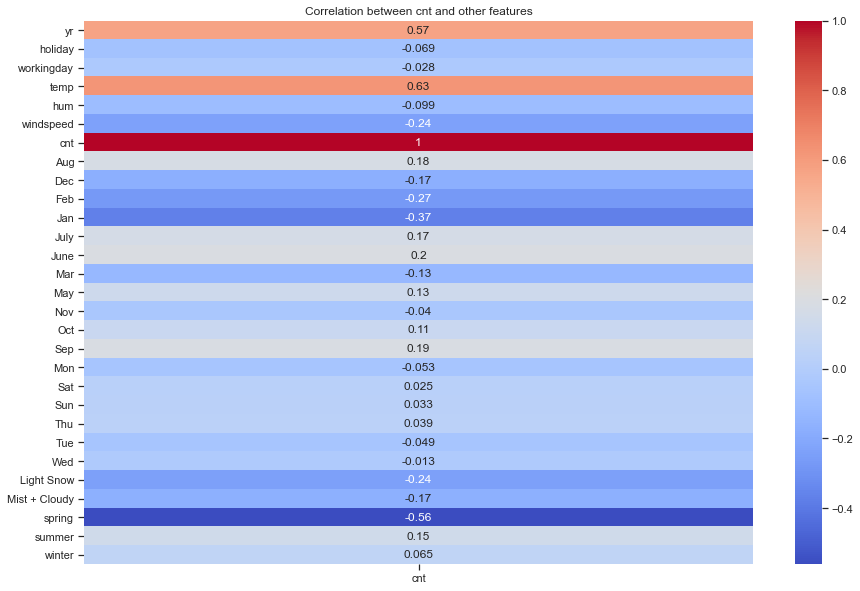

In [48]:
# create a correlation matrix
corr = df1.corr()
# plot a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr[['cnt']], annot=True, cmap='coolwarm')
plt.title('Correlation between cnt and other features')
plt.show()

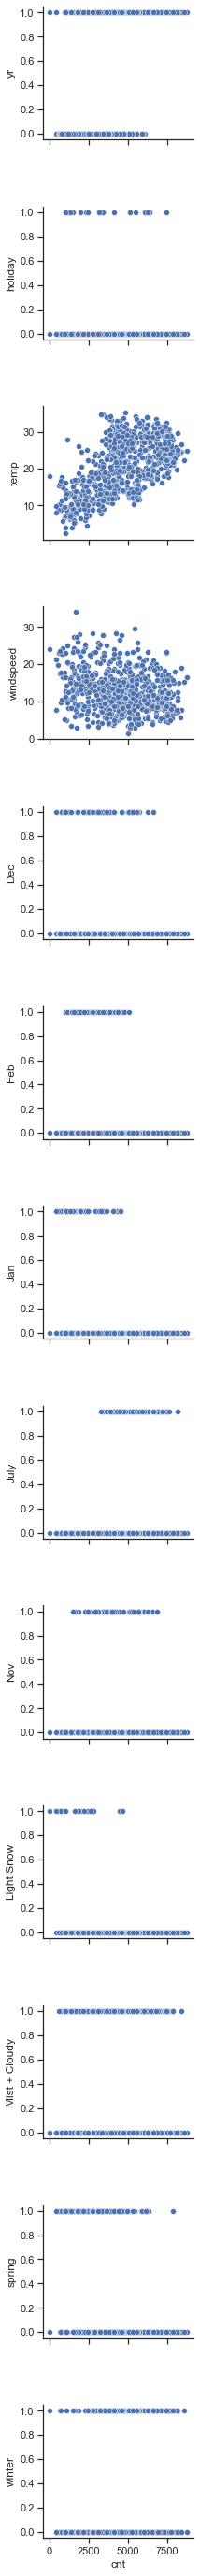

In [49]:
# building scatter plot to observe relationship between the dependent and independent variables
sns.pairplot(df1, y_vars=X_train_lr1.columns, x_vars='cnt', height=3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

**Interpretation:**
- Temperature has linear relationship with the dependent variable i.e. 'cnt'.
- Windspeed has neagtive linear relationship with 'cnt'.
- Also, the graph of error distribution is normal which is an assumption of Linear Regression Model.

<a id="8"> </a>
## Evaluation of the test set

In [50]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('R2 score on the test set is: ', r2_test)

#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('R2 score on the train set is: ', r2_train)

R2 score on the test set is:  0.8178709105867893
R2 score on the train set is:  0.8374957627311341


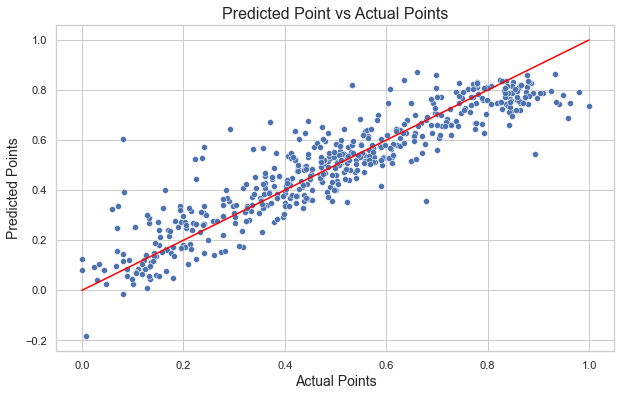

In [51]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(x=y_train, y=y_train_pred, ax=ax)
ax = sns.lineplot(x=y_train, y=y_train, color='red', ax=ax)

ax.set_title("Predicted Point vs Actual Points", fontsize=16)
ax.set_xlabel("Actual Points", fontsize=14)
ax.set_ylabel("Predicted Points", fontsize=14)

plt.show()

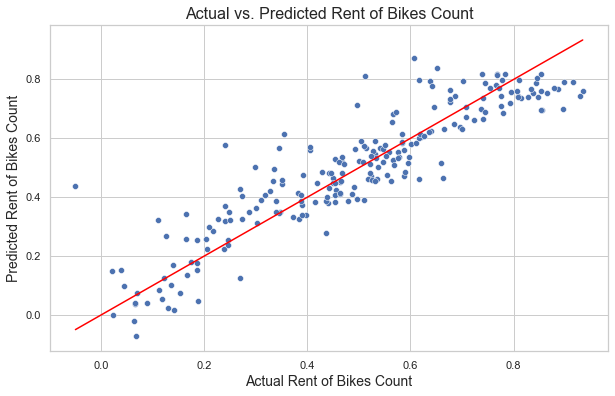

In [52]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax = sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)

ax.set_title("Actual vs. Predicted Rent of Bikes Count", fontsize=16)
ax.set_xlabel("Actual Rent of Bikes Count", fontsize=14)
ax.set_ylabel("Predicted Rent of Bikes Count", fontsize=14)

plt.show()

**Mean Squared Error**

In [53]:
train_mse = np.mean((y_train - y_train_pred)**2)
test_mse = np.mean((y_test - y_pred)**2)
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.009048083963401418
Mean squared error of the test set is 0.009462212563191182


**Our model's mean squared error is nearly zero, which suggests that it correctly predicts the variance in both the test and train datasets.**

In [54]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp             0.37
const            0.30
yr               0.26
winter           0.08
Feb             -0.06
July            -0.06
holiday         -0.08
Mist + Cloudy   -0.08
Dec             -0.09
Jan             -0.09
Nov             -0.09
spring          -0.10
windspeed       -0.14
Light Snow      -0.27
dtype: float64

In [55]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.37 * temp + 0.3 * const + 0.26 * yr + 0.08 * winter + -0.06 * Feb + -0.06 * July + -0.08 * holiday + -0.08 * Mist + Cloudy + -0.09 * Dec + -0.09 * Jan + -0.09 * Nov + -0.1 * spring + -0.14 * windspeed + -0.27 * Light Snow + 

**Equation of the best fit line:**
    
>**cnt = 0.3 + 0.37 * temp + 0.26 * yr + 0.08 * winter - 0.06 * Feb - 0.06 * July - 0.08 * holiday -0.08 * (Mist + Cloudy) - 0.09 * Dec - 0.09 * Jan - 0.09 * Nov - 0.1 * spring - 0.14 * windspeed - 0.27 * Light Snow** 

<a id="9"> </a>
## Summary:

- After data interpretation, visualisation, data preparation, model building and training, residual analysis, and test model evaluation following are the model's conclusions: 

- The test set's R-squared value is 81.78%, whereas the train set's value is 83.74%. This difference shows that our model accurately and comprehensively explains the variance on the test set, leading us to draw the conclusion that it is a good model.

- The mean squared error of our generated model is nearly zero on both the training and testing datasets, indicating that the variance is correctly predicted on the test set. The significant variables were chosen using the p-values and VIF. RFE was also carried out to pick variables automatically.

- We can infer that the temperature has the direct impact on the bike needs for the BoomBikes company (whether it is a working day or not it has no affect). In addition, it appears that demand for rentals is higher in the Autumn season(fall) than it is in the summer and winter. We had seen that rental activity was increased in September and October. 

- According to one of the recommendations based on this model, extensive marketing should be done in the spring and summer to increase rental rates. A solid marketing plan for the first six months of the year can help increase rental rates because the summertime also exhibits low rental levels. 

- As rentals increased in 2019 compared to 2018, it is likely that more people will become aware of this concept in the future. Therefore, it is important to do a thorough study to keep repeat clients.

## END